<a href="https://colab.research.google.com/github/nitish6121999/Assignment-EM/blob/main/Assignment_Euromonitor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Euromonitor Assignment**



##### **Project Type**    - Data Analysis
##### **submitted by**    - Nitish Naik


# **Project Summary -**


"Ice cream Sales Data Analysis" is a comprehensive analysis project that explores the interplay between ice cream sales and economic indicators for 80 countries from 2000 to 2019. The study involves data preprocessing, conversion to a standardized format, and the creation of meaningful variables. By combining ice cream sales data with macroeconomic indicators, the project aims to uncover insights into consumption patterns, calculate per capita variables, and visualize relationships between ice cream volume and GDP per capita. Additionally, a function is implemented to assess missing data percentages for each country and indicator.

# **GitHub Link -**

https://github.com/nitish6121999

# **Problem Statement**


I. ice.cream.data.csv contains Ice Cream sales (volume and value sold) for 80 countries
for years 2000-2019. Using this data, complete the following tasks:
1. For our further analysis, we are only interested in Retail Volume in tonnes
and Retail Value in US dollars. Subset the data accordingly.
2. Remove unnecessary columns. Columns to keep: Region, Country, Data Type,
Unit, Unit Multiplier and years from 2000 to 2019
3. Unit Multiplier is the number corresponding to Unit. If Unit is millions then it
is 1,000,000, if Thousands (000) - 1,000. Convert volume data to kilograms
and value data to US dollars. Then remove Unit and Unit Multiplier columns.
4. Convert data to the analysis friendly format shown in the picture below:

5. Rename variables to “Ice Cream Value” and “Ice Cream Volume”
6. As an additional column, calculate Ice Cream Price.
7. For each year, calculate total volume by Region. Which is the second largest
region by ice cream volumes in 2018?
8. Try writing a function, which applies step I.7. Make it as general as possible.
Using this function calculate:
a) What is the third largest Region by Ice Cream Value?
b) What is the tenth largest country by Ice Cream Volume?
c) Which country had the second largest Ice Cream Price in 2009?

#### **Define Your Business Objective?**

 By analyzing the relationship between ice cream sales and macroeconomic indicators, the project aims to identify market trends, consumer behaviors, and potential growth opportunities. This information can guide business decisions, marketing strategies, and product development to enhance the overall performance and competitiveness of ice cream-related enterprises.







# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [232]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

### Dataset Loading

In [233]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [234]:
# Load Dataset(ice cream Data)
ic_df=pd.read_csv("/content/drive/MyDrive/Access file/enumoniotor/ice.cream.data.csv")

### Dataset First View

In [235]:
# Dataset First Look
ic_df.columns

Index(['Region', 'Country', 'CountryID', 'Industry', 'Edition', 'Category',
       'ParentID', 'Subcategory', 'ProductID', 'Lowest Level', 'Modelled',
       'Hierarchy Level', 'Data Type', 'DataTypeID', 'Unit', 'Unit Multiplier',
       'Current/Constant', 'Currency Conversion', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object')

In [236]:
# Subset the data for Retail Volume and Retail Value


subset_columns = ['Region', 'Country', 'Data Type', 'Unit', 'Unit Multiplier','2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
subset_data = ic_df[subset_columns]
subset_data.head(5)


,Region,Country,Data Type,Unit,Unit Multiplier,2000,2001,2002,2003,2004,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Asia Pacific,Azerbaijan,Retail Volume,million litres,1000000,NaN,NaN,NaN,NaN,NaN,...,NaN,29.238692,30.340307,31.797428,33.885975,35.270988,36.555240,37.919347,39.441743,41.215181
1,Asia Pacific,Azerbaijan,Retail Volume (Tonnes),000 tonnes,1000,13.334554,13.798548,14.340582,15.006165,16.047490,...,21.016289,21.442719,22.242699,23.292057,24.805161,25.817418,26.756105,27.743523,28.852805,30.145005
2,Asia Pacific,Azerbaijan,Total Volume,million litres,1000000,19.577943,20.294977,21.171651,22.172237,23.829250,...,31.683196,32.468827,33.824007,35.596403,38.052311,39.834793,41.564929,43.443030,45.547622,47.999423
3,Asia Pacific,Azerbaijan,Total Volume (Tonnes),000 tonnes,1000,14.931705,15.479710,16.147830,16.897451,18.148897,...,24.040194,24.672854,25.726400,27.091032,28.971497,30.381223,31.765794,33.267206,34.958683,36.929247
4,Asia Pacific,Azerbaijan,Retail Value RSP,USD million,1000000,NaN,NaN,NaN,NaN,NaN,...,NaN,291.810762,322.067461,343.112059,353.900998,355.194703,360.004716,368.686758,380.552781,395.036649


In [237]:
# Filter columns based on Data Type
filtered_df = subset_data[subset_data['Data Type'].isin(['Retail Volume (Tonnes)', 'Retail Value RSP'])]

# Display the filtered DataFrame
filtered_df.head(5)


,Region,Country,Data Type,Unit,Unit Multiplier,2000,2001,2002,2003,2004,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,Asia Pacific,Azerbaijan,Retail Volume (Tonnes),000 tonnes,1000,13.334554,13.798548,14.340582,15.006165,16.047490,...,21.016289,21.442719,22.242699,23.292057,24.805161,25.817418,26.756105,27.743523,28.852805,30.145005
4,Asia Pacific,Azerbaijan,Retail Value RSP,USD million,1000000,NaN,NaN,NaN,NaN,NaN,...,NaN,291.810762,322.067461,343.112059,353.900998,355.194703,360.004716,368.686758,380.552781,395.036649
6,Asia Pacific,China,Retail Volume (Tonnes),000 tonnes,1000,1156.620747,1250.799561,1349.642697,1456.487227,1611.014509,...,2202.080369,2307.703475,2246.740213,2269.596406,2326.098048,2376.110183,2420.433170,2468.486874,2516.706245,2555.051125
9,Asia Pacific,China,Retail Value RSP,USD million,1000000,3263.993487,3497.220401,3781.668370,3978.263049,4203.466262,...,5260.920909,5477.981680,5497.833501,5617.095845,5867.056832,6073.451814,6274.253181,6495.483566,6727.898391,6949.242307
11,Asia Pacific,"Hong Kong, China",Retail Volume (Tonnes),000 tonnes,1000,6.954414,6.896404,6.931408,7.124450,7.382796,...,8.386739,8.527428,8.724715,8.894911,9.030801,9.129246,9.204151,9.296824,9.383251,9.462377


In [238]:
filtered_df.dropna(axis=0, inplace=True)

<ipython-input-238-1e847acea133>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.dropna(axis=0, inplace=True)


In [239]:
filtered_df.isnull().sum()

Region             0
Country            0
Data Type          0
Unit               0
Unit Multiplier    0
2000               0
2001               0
2002               0
2003               0
2004               0
2005               0
2006               0
2007               0
2008               0
2009               0
2010               0
2011               0
2012               0
2013               0
2014               0
2015               0
2016               0
2017               0
2018               0
2019               0
dtype: int64

In [240]:
filtered_df.shape

(153, 25)

In [241]:
filtered_df.head(5)

,Region,Country,Data Type,Unit,Unit Multiplier,2000,2001,2002,2003,2004,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,Asia Pacific,Azerbaijan,Retail Volume (Tonnes),000 tonnes,1000,13.334554,13.798548,14.340582,15.006165,16.047490,...,21.016289,21.442719,22.242699,23.292057,24.805161,25.817418,26.756105,27.743523,28.852805,30.145005
6,Asia Pacific,China,Retail Volume (Tonnes),000 tonnes,1000,1156.620747,1250.799561,1349.642697,1456.487227,1611.014509,...,2202.080369,2307.703475,2246.740213,2269.596406,2326.098048,2376.110183,2420.433170,2468.486874,2516.706245,2555.051125
9,Asia Pacific,China,Retail Value RSP,USD million,1000000,3263.993487,3497.220401,3781.668370,3978.263049,4203.466262,...,5260.920909,5477.981680,5497.833501,5617.095845,5867.056832,6073.451814,6274.253181,6495.483566,6727.898391,6949.242307
11,Asia Pacific,"Hong Kong, China",Retail Volume (Tonnes),000 tonnes,1000,6.954414,6.896404,6.931408,7.124450,7.382796,...,8.386739,8.527428,8.724715,8.894911,9.030801,9.129246,9.204151,9.296824,9.383251,9.462377
14,Asia Pacific,"Hong Kong, China",Retail Value RSP,USD million,1000000,109.382198,109.515471,114.198731,121.280795,126.627639,...,132.133712,129.494363,128.871830,128.976896,131.457344,133.265490,134.767087,136.514965,138.171706,139.728412


In [242]:
df = filtered_df.drop(['Unit', 'Unit Multiplier'], axis=1)

In [243]:
df.head(5)

,Region,Country,Data Type,2000,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,Asia Pacific,Azerbaijan,Retail Volume (Tonnes),13.334554,13.798548,14.340582,15.006165,16.047490,16.893265,17.893932,...,21.016289,21.442719,22.242699,23.292057,24.805161,25.817418,26.756105,27.743523,28.852805,30.145005
6,Asia Pacific,China,Retail Volume (Tonnes),1156.620747,1250.799561,1349.642697,1456.487227,1611.014509,1754.241075,1917.505841,...,2202.080369,2307.703475,2246.740213,2269.596406,2326.098048,2376.110183,2420.433170,2468.486874,2516.706245,2555.051125
9,Asia Pacific,China,Retail Value RSP,3263.993487,3497.220401,3781.668370,3978.263049,4203.466262,4472.165322,4781.868695,...,5260.920909,5477.981680,5497.833501,5617.095845,5867.056832,6073.451814,6274.253181,6495.483566,6727.898391,6949.242307
11,Asia Pacific,"Hong Kong, China",Retail Volume (Tonnes),6.954414,6.896404,6.931408,7.124450,7.382796,7.619667,7.891634,...,8.386739,8.527428,8.724715,8.894911,9.030801,9.129246,9.204151,9.296824,9.383251,9.462377
14,Asia Pacific,"Hong Kong, China",Retail Value RSP,109.382198,109.515471,114.198731,121.280795,126.627639,129.913031,132.712168,...,132.133712,129.494363,128.871830,128.976896,131.457344,133.265490,134.767087,136.514965,138.171706,139.728412


In [244]:
# understanding on how data format should be
df.head(10).T

,1,6,9,11,14,16,19,21,24,26
Region,Asia Pacific,Asia Pacific,Asia Pacific,Asia Pacific,Asia Pacific,Asia Pacific,Asia Pacific,Asia Pacific,Asia Pacific,Asia Pacific
Country,Azerbaijan,China,China,"Hong Kong, China","Hong Kong, China",India,India,Indonesia,Indonesia,Japan
Data Type,Retail Volume (Tonnes),Retail Volume (Tonnes),Retail Value RSP,Retail Volume (Tonnes),Retail Value RSP,Retail Volume (Tonnes),Retail Value RSP,Retail Volume (Tonnes),Retail Value RSP,Retail Volume (Tonnes)
2000,13.334554,1156.620747,3263.993487,6.954414,109.382198,27.816348,176.196358,31.43843,158.979091,561.051149
2001,13.798548,1250.799561,3497.220401,6.896404,109.515471,31.096245,195.738073,33.205945,176.289509,549.026033
2002,14.340582,1349.642697,3781.66837,6.931408,114.198731,34.690343,215.545008,34.985068,190.234208,535.839802
2003,15.006165,1456.487227,3978.263049,7.12445,121.280795,38.455489,235.700334,36.771028,203.103095,524.612205
2004,16.04749,1611.014509,4203.466262,7.382796,126.627639,42.568211,259.092189,38.592232,214.985074,556.674247
2005,16.893265,1754.241075,4472.165322,7.619667,129.913031,46.745526,280.632903,40.539714,218.271073,540.3253
2006,17.893932,1917.505841,4781.868695,7.891634,132.712168,55.724606,318.525779,42.656222,214.169377,532.051794


In [245]:
# Melt the DataFrame to transform years into rows
melted_df = pd.melt(df, id_vars=['Region', 'Country', 'Data Type'], var_name='Year', value_name='Value')

# Filter the melted DataFrame for the desired Data Types
filtered_df = melted_df[melted_df['Data Type'].isin(['Retail Volume (Tonnes)', 'Retail Value RSP'])]

# Pivot the DataFrame to get the desired format
final_df = filtered_df.pivot_table(index=['Region', 'Country', 'Year'], columns='Data Type', values='Value').reset_index()

# Rename the columns
final_df.columns.name = None  # Remove the name of the columns index

# Display the final DataFrame
final_df.head(30)


,Region,Country,Year,Retail Value RSP,Retail Volume (Tonnes)
0,Asia Pacific,Azerbaijan,2000,NaN,13.334554
1,Asia Pacific,Azerbaijan,2001,NaN,13.798548
2,Asia Pacific,Azerbaijan,2002,NaN,14.340582
3,Asia Pacific,Azerbaijan,2003,NaN,15.006165
4,Asia Pacific,Azerbaijan,2004,NaN,16.047490
5,Asia Pacific,Azerbaijan,2005,NaN,16.893265
6,Asia Pacific,Azerbaijan,2006,NaN,17.893932
7,Asia Pacific,Azerbaijan,2007,NaN,19.478776
8,Asia Pacific,Azerbaijan,2008,NaN,20.241604
9,Asia Pacific,Azerbaijan,2009,NaN,20.779355


In [246]:
final_df.dropna(axis=0, inplace=True)
final_df.isna().sum()
final_df.shape

(1460, 5)

In [247]:
final_df.head(10)

,Region,Country,Year,Retail Value RSP,Retail Volume (Tonnes)
20,Asia Pacific,China,2000,3263.993487,1156.620747
21,Asia Pacific,China,2001,3497.220401,1250.799561
22,Asia Pacific,China,2002,3781.668370,1349.642697
23,Asia Pacific,China,2003,3978.263049,1456.487227
24,Asia Pacific,China,2004,4203.466262,1611.014509
25,Asia Pacific,China,2005,4472.165322,1754.241075
26,Asia Pacific,China,2006,4781.868695,1917.505841
27,Asia Pacific,China,2007,4997.793495,2034.154399
28,Asia Pacific,China,2008,5130.231483,2136.728715
29,Asia Pacific,China,2009,5088.670367,2105.541702


In [248]:
# Specify the columns to convert
volume_column = 'Retail Volume (Tonnes)'
value_column = 'Retail Value RSP'

# Convert volume data to kilograms
final_df[volume_column] *= 1000

# Convert value data to US dollars
final_df[value_column] *= 1000000

final_df = final_df.reset_index(drop=True)
final_df.head(5)

,Region,Country,Year,Retail Value RSP,Retail Volume (Tonnes)
0,Asia Pacific,China,2000,3.263993e+09,1156620.747
1,Asia Pacific,China,2001,3.497220e+09,1250799.561
2,Asia Pacific,China,2002,3.781668e+09,1349642.697
3,Asia Pacific,China,2003,3.978263e+09,1456487.227
4,Asia Pacific,China,2004,4.203466e+09,1611014.509


## 5. Rename variables to “Ice Cream Value” and “Ice Cream Volume”
## 6. As an additional column, calculate Ice Cream Price.

In [249]:
final_df = final_df.rename(columns={'Retail Volume (Tonnes)': 'Ice Cream Volume', 'Retail Value RSP': 'Ice Cream Value'})
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Region            1460 non-null   object 
 1   Country           1460 non-null   object 
 2   Year              1460 non-null   object 
 3   Ice Cream Value   1460 non-null   float64
 4   Ice Cream Volume  1460 non-null   float64
dtypes: float64(2), object(3)
memory usage: 57.2+ KB


In [250]:
final_df['Ice Cream Price'] = final_df['Ice Cream Value'] / final_df['Ice Cream Volume']
final_df.head()

,Region,Country,Year,Ice Cream Value,Ice Cream Volume,Ice Cream Price
0,Asia Pacific,China,2000,3.263993e+09,1156620.747,2822.008420
1,Asia Pacific,China,2001,3.497220e+09,1250799.561,2795.987871
2,Asia Pacific,China,2002,3.781668e+09,1349642.697,2801.977426
3,Asia Pacific,China,2003,3.978263e+09,1456487.227,2731.409500
4,Asia Pacific,China,2004,4.203466e+09,1611014.509,2609.204472


## 7. For each year, calculate total volume by Region. Which is the second largest region by ice cream volumes in 2018?
## 8. Try writing a function, which applies step I.7. Make it as general as possible. Using this function calculate:
a) What is the third largest Region by Ice Cream Value?

b) What is the tenth largest country by Ice Cream Volume?

c) Which country had the second largest Ice Cream Price in 2009?

In [251]:
def calculate_total_volume_by_region(final_df, year):
    # Filter the DataFrame for the specified year
    year_df = df[['Region', f'{year}']].copy()

    # Group by Region and sum the volumes
    total_volume_by_region = year_df.groupby('Region')[f'{year}'].sum().reset_index()

    # Sort by total volume in descending order
    total_volume_by_region = total_volume_by_region.sort_values(by=f'{year}', ascending=False)

    return total_volume_by_region

# step 7 (2018)
total_volume_2018 = calculate_total_volume_by_region(df, 2018)

print("Total Volume by Region in 2018:")
print(total_volume_2018)
# for this function we can see for all the region by value in 2018

Total Volume by Region in 2018:
                   Region          2018
6          Western Europe  26189.331793
0            Asia Pacific  21953.965975
5           North America  18547.416231
3           Latin America  13274.422742
2          Eastern Europe   8109.797281
4  Middle East and Africa   6369.369604
1             Australasia   2403.882855


In [252]:
# a) What is the third largest Region by Ice Cream Value?
total_value_by_region = calculate_total_volume_by_region(final_df, 2018)
third_largest_region_value = total_value_by_region.iloc[2]['Region']
print("Third Largest Region by Ice Cream Value in 2018:", third_largest_region_value)

# b) What is the tenth largest Country by Ice Cream Volume?
# Assuming you want to calculate for a specific year (e.g., 2018)
tenth_largest_country_volume = final_df.sort_values(by='Year', ascending=False).iloc[9]['Country']
print("Tenth Largest Country by Ice Cream Volume in 2018:", tenth_largest_country_volume)

# c) Which Country had the second largest Ice Cream Price in 2009?
# Assuming 'Ice Cream Price' is calculated and present in the DataFrame
second_largest_country_price_2009 = final_df.sort_values(by='Ice Cream Price', ascending=False).iloc[1]['Country']
print("Country with the Second Largest Ice Cream Price in 2009:", second_largest_country_price_2009)


Third Largest Region by Ice Cream Value in 2018: North America
Tenth Largest Country by Ice Cream Volume in 2018: Spain
Country with the Second Largest Ice Cream Price in 2009: Venezuela


****************************************************************************************************************************************************************

# || macro.data.csv contains GDP, Population and Possession of Refrigerator data for 80 countries from 1977 to 2030. Using this data, complete the following tasks:

In [253]:
macro_df=pd.read_csv('/content/drive/MyDrive/Access file/enumoniotor/macro.data.csv')

In [254]:
macro_df.columns

Index(['Region', 'Country', 'CountryID', 'Industry', 'Edition', 'Category',
       'ParentID', 'Subcategory', 'ProductID', 'Lowest Level', 'Modelled',
       'Hierarchy Level', 'Data Type', 'DataTypeID', 'Unit', 'Unit Multiplier',
       'Current/Constant', 'Currency Conversion', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024',
       '2025', '2026', '2027', '2028', '2029', '2030'],
      dtype='object')

In [255]:
columns = ['Region', 'Country', 'Subcategory', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
subset = macro_df[columns]
subset.tail(5)

,Region,Country,Subcategory,2000,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
235,Western Europe,Switzerland,Population: National Estimates at January 1st,7164.444000,7204.05500,7255.653000,7313.853000,7364.148000,7415.102000,7459.128000,...,7785.806000,7870.134000,7952.554362,8031.522823,8101.990785,8166.807018,8229.290429,8291.143357,8353.602188,8412.306939
236,Western Europe,Turkey,Possession of Refrigerator,94.700000,95.60000,96.448090,97.904075,97.891058,98.012311,98.516350,...,98.200000,98.400000,98.600000,98.634000,98.702000,98.760000,98.830000,98.870000,98.934000,99.000000
237,Western Europe,Turkey,Population: National Estimates at January 1st,63740.632850,64609.56629,65476.515870,66333.546120,67187.600570,68028.759890,68860.991810,...,72561.312000,73722.988000,74724.269000,75572.954710,76388.987260,77187.263860,77967.149390,78727.479300,79467.801870,80188.555200
238,Western Europe,United Kingdom,Possession of Refrigerator,98.917162,99.05250,99.188022,99.195000,99.218807,99.257701,99.306932,...,99.518866,99.563234,99.603682,99.640539,99.674146,99.704772,99.724593,99.742104,99.756263,99.766990
239,Western Europe,United Kingdom,Population: National Estimates at January 1st,58785.246000,58999.78100,59233.900000,59490.201000,59785.236000,60171.462000,60604.531000,...,62471.264000,63024.472000,63495.351000,63887.988000,64301.961890,64720.177250,65142.203360,65566.971810,65992.923000,66418.451740


In [256]:
subset.shape

(240, 23)

In [257]:
# Melt the DataFrame to transform years into rows
melted = pd.melt(subset, id_vars=['Region', 'Country', 'Subcategory'], var_name='Year', value_name='Value')

# Pivot the DataFrame to get the desired format
final = melted.pivot_table(index=['Region', 'Country', 'Year'], columns='Subcategory', values='Value').reset_index()

# Rename the columns
final.columns.name = None

# Display the final DataFrame
final.head(30)


,Region,Country,Year,Possession of Refrigerator,Total GDP,Population: National Estimates at January 1st
0,Asia Pacific,Azerbaijan,2000,89.000000,1.748362e+04,8.032800e+03
1,Asia Pacific,Azerbaijan,2001,94.000000,1.921490e+04,8.114300e+03
2,Asia Pacific,Azerbaijan,2002,94.800000,2.102749e+04,8.191400e+03
3,Asia Pacific,Azerbaijan,2003,95.200000,2.317461e+04,8.269200e+03
4,Asia Pacific,Azerbaijan,2004,95.550000,2.531940e+04,8.349100e+03
5,Asia Pacific,Azerbaijan,2005,95.790000,3.239876e+04,8.447400e+03
6,Asia Pacific,Azerbaijan,2006,96.040000,4.356617e+04,8.553100e+03
7,Asia Pacific,Azerbaijan,2007,96.320000,5.465828e+04,8.666100e+03
8,Asia Pacific,Azerbaijan,2008,96.520000,6.044741e+04,8.779900e+03
9,Asia Pacific,Azerbaijan,2009,96.760000,6.611131e+04,8.922400e+03


****************************************************************************************************************************************************************

## III. Combine data:

1. Join both data frames and do all the following tasks on this joint data
2. Subset data to years, which are present in Ice Cream Data. Is this step
necessary? Is there something you could have done in previous steps, so that
you would not have to do this?
3. Calculate per capita variables where appropriate.
4. Visualize the relationship between Ice Cream Volume per Capita and GDP per
Capita. Write your visualization to “Output” folder.
5. Write a function, which calculates percent of missing data for each Country
and each Indicator. The result of a function should be easy to read table.
Write this table to “Output” folder.

In [258]:
# Merge the two DataFrames
merged_data = pd.merge(final_df, final, on=['Region', 'Country', 'Year'], how='inner')


In [259]:
print(final_df.shape)
print(final.shape)
print(merged_data.shape)

(1460, 6)
(1600, 6)
(1460, 9)


Merging based on years which is to consider only the year 2000-2019 . the merged data will have only those data

In [260]:
# Assuming you have a DataFrame named merged_data
merged_data = merged_data.rename(columns={
    'Possession of Refrigerator': 'Possession of Refrigerator',
    '  Total GDP': 'GDP',
    'Population: National Estimates at January 1st': 'Population'
})


In [261]:
merged_data.head(5)

,Region,Country,Year,Ice Cream Value,Ice Cream Volume,Ice Cream Price,Possession of Refrigerator,GDP,Population
0,Asia Pacific,China,2000,3.263993e+09,1156620.747,2822.008420,40.597764,2758412.439,1257860.0
1,Asia Pacific,China,2001,3.497220e+09,1250799.561,2795.987871,42.961312,2987360.672,1267430.0
2,Asia Pacific,China,2002,3.781668e+09,1349642.697,2801.977426,46.958090,3258672.768,1276270.0
3,Asia Pacific,China,2003,3.978263e+09,1456487.227,2731.409500,49.077471,3585354.713,1284530.0
4,Asia Pacific,China,2004,4.203466e+09,1611014.509,2609.204472,51.669063,3946937.736,1292270.0


In [262]:
# Calculate per capita variables
merged_data['Ice Cream Volume per Capita'] = merged_data['Ice Cream Volume'] / merged_data['Population']
merged_data['GDP per Capita'] = merged_data['GDP'] / merged_data['Population']


In [263]:
print(merged_data.columns)


Index(['Region', 'Country', 'Year', 'Ice Cream Value', 'Ice Cream Volume',
       'Ice Cream Price', '  Possession of Refrigerator', 'GDP', 'Population',
       'Ice Cream Volume per Capita', 'GDP per Capita'],
      dtype='object')


In [264]:
merged_data.head(5)

,Region,Country,Year,Ice Cream Value,Ice Cream Volume,Ice Cream Price,Possession of Refrigerator,GDP,Population,Ice Cream Volume per Capita,GDP per Capita
0,Asia Pacific,China,2000,3.263993e+09,1156620.747,2822.008420,40.597764,2758412.439,1257860.0,0.919515,2.192941
1,Asia Pacific,China,2001,3.497220e+09,1250799.561,2795.987871,42.961312,2987360.672,1267430.0,0.986879,2.357022
2,Asia Pacific,China,2002,3.781668e+09,1349642.697,2801.977426,46.958090,3258672.768,1276270.0,1.057490,2.553279
3,Asia Pacific,China,2003,3.978263e+09,1456487.227,2731.409500,49.077471,3585354.713,1284530.0,1.133868,2.791180
4,Asia Pacific,China,2004,4.203466e+09,1611014.509,2609.204472,51.669063,3946937.736,1292270.0,1.246655,3.054267


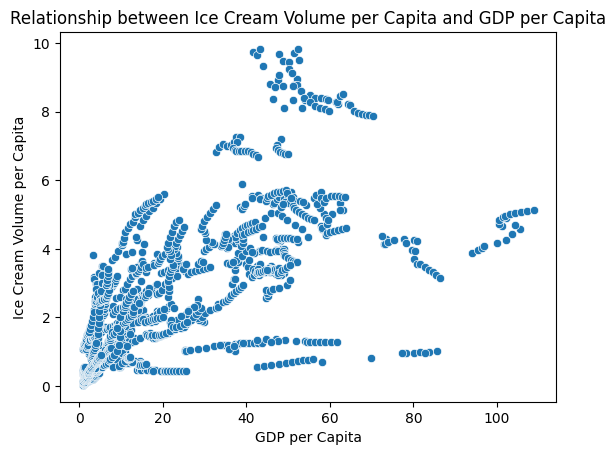

In [265]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
sns.scatterplot(x='GDP per Capita', y='Ice Cream Volume per Capita', data=merged_data)
plt.title('Relationship between Ice Cream Volume per Capita and GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Ice Cream Volume per Capita')
plt.show()


In [266]:
def calculate_missing_percent(df):
    missing_percent = df.isnull().mean() * 100
    missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
    return missing_percent

# Apply the function to the merged data
missing_data_percentage = calculate_missing_percent(ic_df)

# Save the result to a file
#missing_data_percentage.to_csv('Output/missing_data_percentage.csv')


Here we can calculate the missing values for data of macro and ice cream sales data , but for the merged data we have considered the null values and dropped them accordingly

In [267]:
missing_data_percentage

Current/Constant    80.0
2000                 3.5
2001                 3.0
2002                 3.0
2003                 3.0
2004                 2.5
2005                 2.5
2006                 2.5
2007                 2.5
2008                 2.0
2009                 2.0
2010                 1.5
2011                 0.5
2012                 0.5
2013                 0.5
dtype: float64

Thank you